# Introduction to Convolutional Neural Network

**In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of artificial neural network (ANN), most commonly applied to analyze visual imagery. CNNs are also known as Shift Invariant or Space Invariant Artificial Neural Networks (SIANN), based on the shared-weight architecture of the convolution kernels or filters that slide along input features and provide translation-equivariant responses known as feature maps. Counter-intuitively, most convolutional neural networks are not invariant to translation, due to the downsampling operation they apply to the input. They have applications in image and video recognition, recommender systems, image classification, image segmentation, medical image analysis, natural language processing, brain–computer interfaces, and financial time series.**

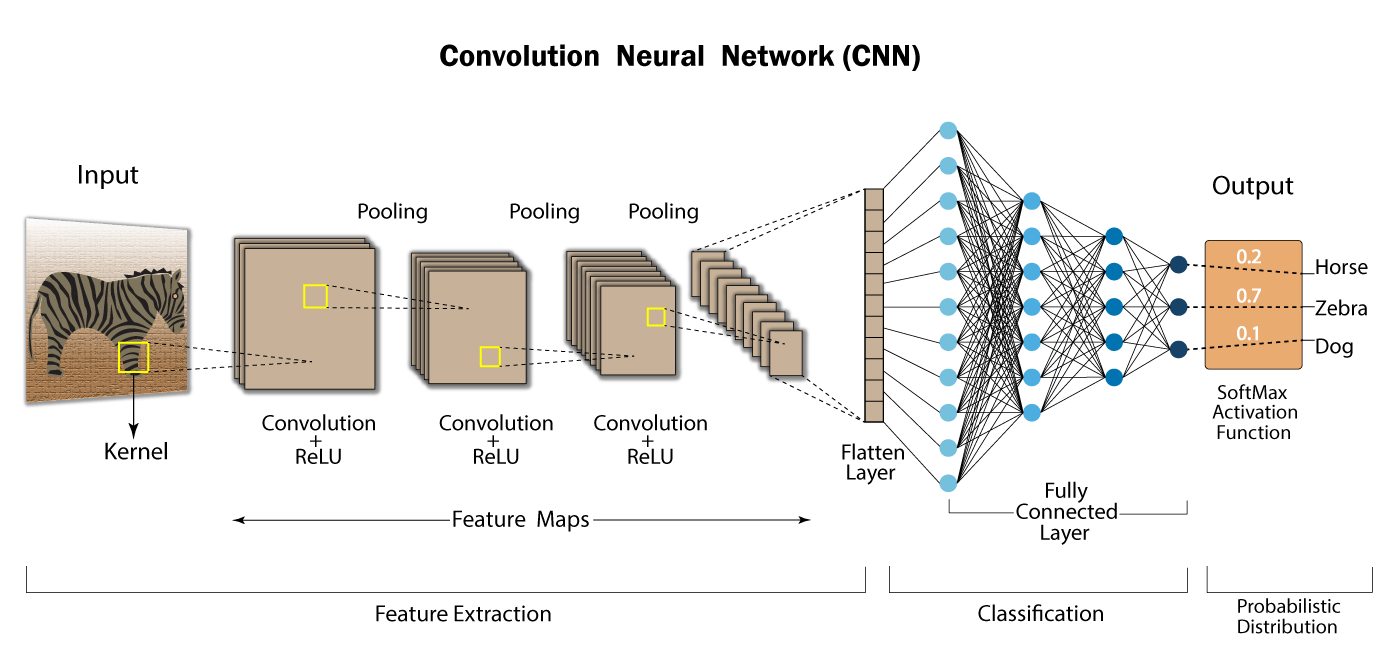

**CNNs are regularized versions of multilayer perceptrons. Multilayer perceptrons usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "full connectivity" of these networks make them prone to overfitting data. Typical ways of regularization, or preventing overfitting, include: penalizing parameters during training (such as weight decay) or trimming connectivity (skipped connections, dropout, etc.) CNNs take a different approach towards regularization: they take advantage of the hierarchical pattern in data and assemble patterns of increasing complexity using smaller and simpler patterns embossed in their filters. Therefore, on a scale of connectivity and complexity, CNNs are on the lower extreme.**

# The Detection Of Eyes

The eyes are the window to the soul. Or so the saying goes. But they’re also a window to a wide range of applications for Computer Vision development. From eye tracking to gaze estimation, eye-focused datasets are powering computer vision applications in a wide range of verticals. Here are a few examples:

* Virtual and Mixed Reality head-mounted devices rely on eye-gaze estimation to enable efficient rendering and to offer the user realistic interaction with the content. By being able to detect where your gaze is, the VR device can render only that part of the scene thus enabling higher quality for that segment and a more seamless experience. This technique is called foveated rendering and can significantly alleviate the computational and energy burden of VR.
* Gaze tracking is used in assistive devices for sight-impaired people. Additionally, eye-tracking can help people with motor-impairments interact with computers and can be used to control robotic arms and powered wheelchairs. 
* In commercial contexts, eye tracking and gaze estimation are used to determine engagement with advertisements and content. Eye tracking can be used to provide valuable insight into which features on a web page or in a physical store are the most eye-catching and engaging. 
* Many car manufacturers leverage eye-tracking technology to enhance safety and driver fatigue detection. The ability to classify eye states based on pupil dilation, blink-rate, or eye-closures provides a key metric for detecting drowsiness among drivers. Fatigue causes 20% of car crashes, so the ability to diagnose fatigued drivers and alert them to take a break can save thousands of lives. 

### The key to developing Computer Vision applications is Data. In this case, large datasets of eyes are the key to continue developing and improving the technologies outlined above. 

#### we’ll examine some popular and high-quality datasets focused on eyes. 
#### [Eyes Image Dataset For Machine Learning Data set](#https://www.kaggle.com/datasets/brsdincer/eyes-image-dataset-for-machine-learning)

**About Data set:**
- Affiliation – Technical University of Ostrava, Media Research Lab
- Publication – ISVC
- Released – 2018
- Description – This dataset was captured using near-infrared cameras, in order to create a dataset with images that would best train a model tasked with recognizing the eyes of the user in a dark car at night. 
- Main Use – The main use of this dataset is eye detection and pupil localizations, especially for the use cases of recognition of driver behavior. Namely, fatigue, drowsiness, gaze direction, and blinking frequency. 
- Number of Images  – 85,000. 
- Subjects – 37 
- Annotations – This dataset features relatively simple annotations. The images are classified into different categories but don’t have bounding boxes or segmentation.
- Bottom Line – The MRL dataset was designed with a specific use case in mind, and provides a good solution to it. A drawback to the dataset is the low level of sophistication of the annotations.


**Annotation:**

- **subject ID:** xxx

- **image number:** xxx

- **gender:** { 0 : male , 1 : famale}

- **glasses:** { 0 : no , 1 : yes }

- **eye state:** { 0 : close , 1 : open }

- **reflections:** { 0 : none , 1 : low , 2 : high }

- **lighting conditions/image quality:** { 0 : bad , 1 : good }

- **sensor type:**
>- 01 : RealSense SR300 640x480
>- 02 : IDS Imaging, 1280x1024
>- 03 : Aptina Imagin 752x480

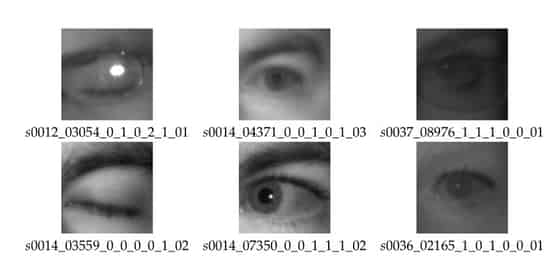

### [More details in Github link](https://github.com/Abdelaziz-Nabil/CNN-Detection-Of-Eyes-and-Classification)

https://github.com/Abdelaziz-Nabil/CNN-Detection-Of-Eyes-and-Classification

# Code

## import Library

In [1]:
#!pip install opendatasets
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.9/989.9 kB 4.9 MB/s eta 0:00:00


In [2]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
import random, shutil
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
import itertools
from keras.layers import (
    Dropout,
    Conv2D,
    Flatten,
    Dense,
    MaxPooling2D,
    BatchNormalization,
)
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
import visualkeras

import os
import shutil
import glob
from tqdm import tqdm
import random
import plotly.express as px
import pandas

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D ,AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img # Data Augumentation



## Move Data

In [3]:
def creat(path):     
    try: 
        os.mkdir(path) 
    except OSError as error: 
        print(error) 

In [4]:
path = './data set'

creat(path)


path = './data set/data'
creat(path)

path_train = path+"/train"
creat(path_train)

path_test = path+"/test"
creat(path_test)

path_open = path_train+"/Open"
creat(path_open)    

path_open = path_test+"/Open"
creat(path_open)    

path_close =  path_test+"/Closed"
creat(path_close)

path_close =path_train+"/Closed"
creat(path_close)

In [5]:
path='../input/eyes-image-dataset-for-machine-learning/eyes data'
path2="./data set/data"

In [6]:
for dirpath, dirname, filenames in os.walk(path):
    for i in tqdm([f for f in filenames if f.endswith('.png')]):
        if i.split('_')[4]=='0':
            shutil.copy(src=dirpath+'/'+i, dst=path2+'/train/Closed')
        
        elif i.split('_')[4]=='1':
            shutil.copy(src=dirpath+'/'+i, dst=path2+'/train/Open')

0it [00:00, ?it/s]
100%|██████████| 1384/1384 [00:05<00:00, 231.43it/s]


## Split Images

In [7]:
def create_test_closed(source, destination, percent):
    '''
    divides closed eyes images into given percent and moves from
    source to destination.
    
    Arguments:
    source(path): path of source directory
    destination(path): path of destination directory
    percent(float): percent of data to be divided(range: 0 to 1)
    '''
    path, dirs, files_closed = next(os.walk(source))
    file_count_closed = len(files_closed)
    percentage = file_count_closed * percent
    to_move = random.sample(glob.glob(source + "/*.png"), int(percentage))

    for f in enumerate(to_move):
        if not os.path.exists(destination):
            os.makedirs(destination)
        shutil.move(f[1], destination)
    print(f'moved {int(percentage)} images to the destination successfully.')  


def create_test_open(source, destination, percent):
    '''
    divides open eyes images into given percent and moves from
    source to destination.
    
    Arguments:
    source(path): path of source directory
    destination(path): path of destination directory
    percent(float): percent of data to be divided(range: 0 to 1)
    '''
    path, dirs, files_open = next(os.walk(source))
    file_count_open = len(files_open)
    percentage = file_count_open * percent
    to_move = random.sample(glob.glob(source + "/*.png"), int(percentage))

    for f in enumerate(to_move):
        if not os.path.exists(destination):
            os.makedirs(destination)
        shutil.move(f[1], destination)
    print(f'moved {int(percentage)} images to the destination successfully.')

In [8]:
create_test_closed(path2+'/train/Closed', 
                    path2+'/test/Closed', 
                    0.2)

moved 8389 images to the destination successfully.


In [9]:
create_test_open(path2+'/train/Open', 
                path2+'/test/Open', 
                    0.2)

moved 8590 images to the destination successfully.


In [10]:
path = './data set/data/Process'
creat(path)

defore = path+"/Open"
creat(defore)

after = path+"/Closed"
creat(after)

create_test_open(path2+'/test/Open', 
                defore, 
                    0.0011)

create_test_closed(path2+'/test/Closed', 
                    after, 
                    0.0011)

moved 9 images to the destination successfully.
moved 9 images to the destination successfully.


In [11]:
def walk_data(mydict, folder_path):
    for (root,dirs,files) in os.walk(folder_path, topdown=False):
        if len(files)>0:
            mydict[root]=len(files)
        

In [12]:
train_dict = dict()
test_dict = dict()
walk_data(train_dict,path2+"/train/")
walk_data(test_dict, path2+"/test/")

In [13]:
def fix_keys(mydict,typ):
    new_dict = dict()
    for k, v in mydict.items():
        new_k = k.split('/')[-1]
        new_dict[new_k+" "+typ] = v
    return new_dict

In [14]:
train_dict = fix_keys(train_dict,'train')
test_dict = fix_keys(test_dict,'test')
print(train_dict)
print(test_dict)


{'Closed train': 33557, 'Open train': 34362}
{'Closed test': 8380, 'Open test': 8581}


In [15]:
label_train_dict = {'Expressions':train_dict.keys(), 'Count':train_dict.values}
label_val_dict = {'Expressions':test_dict.keys(), 'Count':test_dict.values}

In [16]:
def plot_dist(my_dict, data):
    fig = px.bar(x=my_dict.values(),
             y=my_dict.keys(),
             orientation='h',
             color=my_dict.values(),
             title=data + ' Distribution',
             opacity=0.8,
             color_discrete_sequence=px.colors.diverging.curl,
             template='plotly_dark'
            )
    fig.update_xaxes()
    fig.show()

In [17]:
dict={**test_dict, **train_dict}
print(dict)

{'Closed test': 8380, 'Open test': 8581, 'Closed train': 33557, 'Open train': 34362}


In [18]:
plot_dist(dict, "Data")

## Data Preparation

In [19]:
def plot_exp(expression):
    pa="./data set/data/Process/"
    plt.style.use('dark_background')
    plt.figure(figsize= (12,12))
    for i in range(1, 4, 1):
        plt.subplot(1,3,i)
        img = load_img(pa+expression+"/"+
                  os.listdir(pa+expression)[i*2], target_size=(80, 80))
        plt.imshow(img)   
    plt.show()

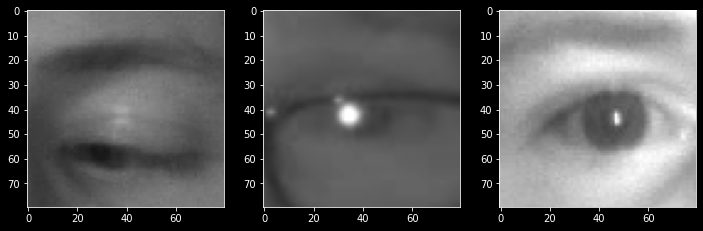

In [20]:
plot_exp("Open")

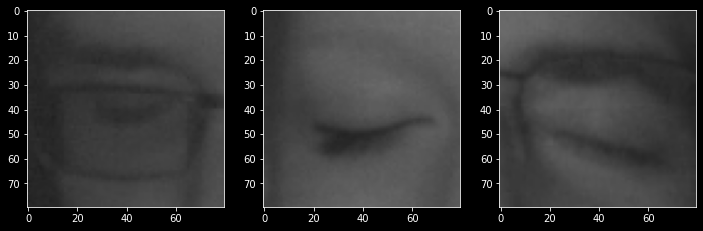

In [21]:
plot_exp("Closed")

In [22]:
_datagen= image.ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,zoom_range=0.2,)

afrer_data= _datagen.flow_from_directory('./data set/data/Process',
                                            class_mode='binary',
                                            shuffle=False,
                                            color_mode="grayscale",
                                            target_size=(80,80),
                                            batch_size=18,
                                            )


Found 18 images belonging to 2 classes.


In [23]:
x_batch, y_batch = afrer_data.next()

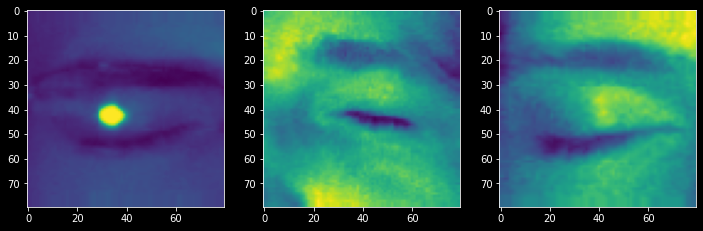

In [24]:
plt.style.use('dark_background')
plt.figure(figsize= (12,12))
for i in range(1, 4, 1):
    image_ = x_batch[i*2]
    plt.subplot(1,3,i)
    plt.imshow(image_[:, :, ::-1])
plt.show()  

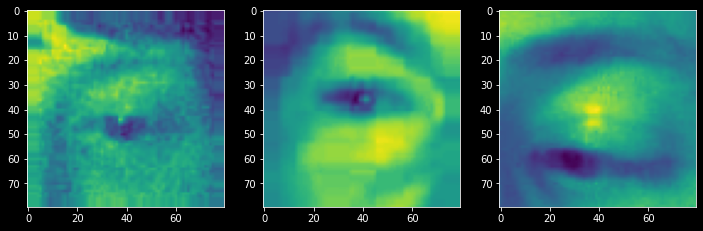

In [25]:
plt.figure(figsize= (12,12))
for i in range(9, 12, 1):
    image_ = x_batch[((i-8)*2)+8]
    plt.subplot(1,3,i-8)
    plt.imshow(image_[:, :, ::-1])
plt.show()  

In [26]:
train_datagen= image.ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,zoom_range=0.2)

train_data= train_datagen.flow_from_directory(path2+"/train",
                                              class_mode="binary",
                                              shuffle=True,
                                              color_mode="grayscale",
                                              target_size=(80,80),
                                              batch_size=64,
                                              )

test_datagen= image.ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,zoom_range=0.2)
test_data= test_datagen.flow_from_directory(path2+"/test",
                                            class_mode="binary",
                                            shuffle=True,
                                            color_mode="grayscale",
                                            target_size=(80,80),
                                            batch_size=64,
                                            )

Found 67919 images belonging to 2 classes.
Found 16961 images belonging to 2 classes.


In [27]:
test_data.class_indices

{'Closed': 0, 'Open': 1}

In [28]:
train_data.class_indices


{'Closed': 0, 'Open': 1}

# Models

In [29]:
!nvidia-smi

Tue Nov 15 03:38:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

## Part 1: CNN
### Model Architecture using CNN

In [30]:
cnn_model = Sequential(
    [
        Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(80, 80, 1)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2 , 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        AveragePooling2D(pool_size=(3 , 3)),
        Dropout(0.5,seed=1234),
      
        Flatten(),
        Dense(90, activation="relu"),
        Dropout(0.5,seed=1234),
        Dense(64, activation="relu"),
        Dropout(0.25,seed=1234),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid")
    ]
)

2022-11-15 03:38:27.741330: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 03:38:27.742397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 03:38:27.747240: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 03:38:27.748105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 03:38:27.748980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [31]:
checkpoint = ModelCheckpoint('./data set/data/CNNmodel2.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=3, verbose= 0, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 0 )

callbacks=[checkpoint,earlystop,learning_rate]

In [32]:
cnn_model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 76, 76, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 64)        36928     
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

### Visualizing our CNN architecture

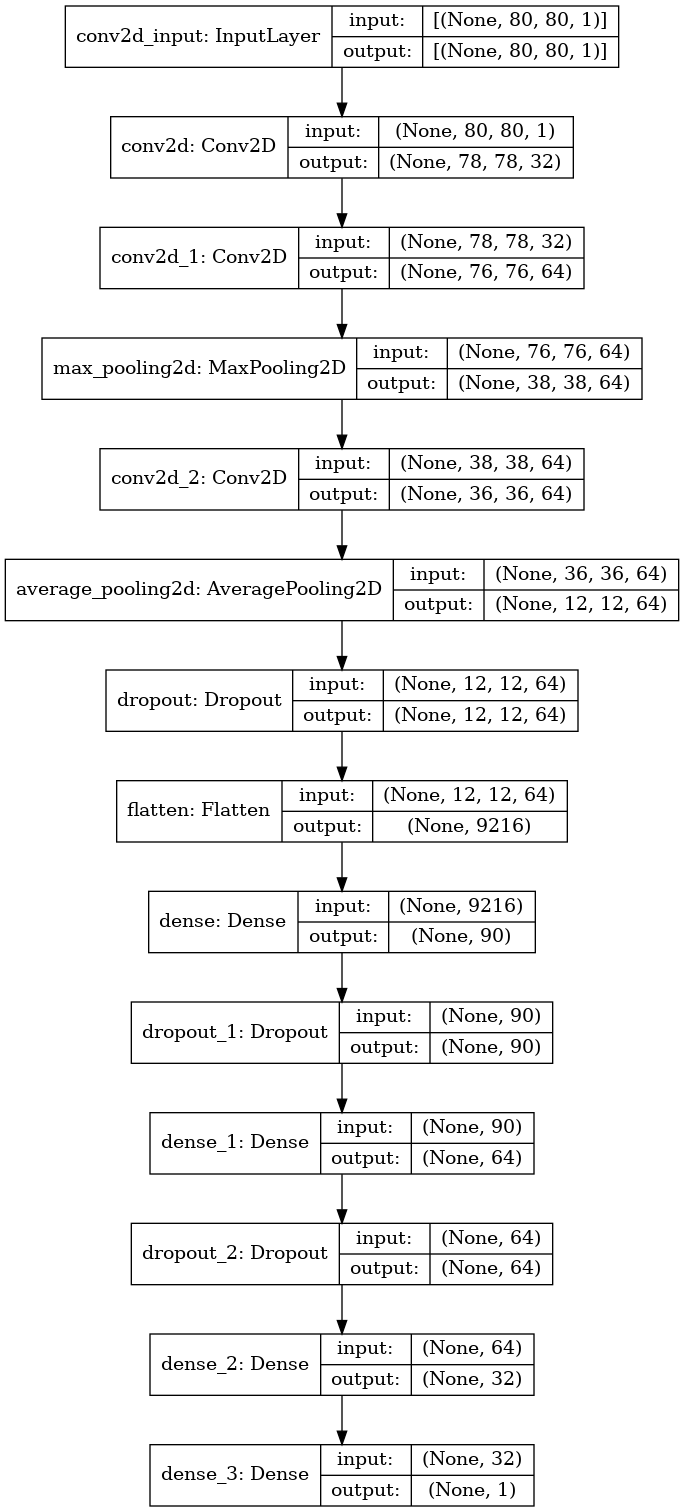

In [34]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(cnn_model, to_file=path2+'/cnnmodel2.png', show_shapes=True, show_layer_names=True)
Image(path2+"/cnnmodel2.png")

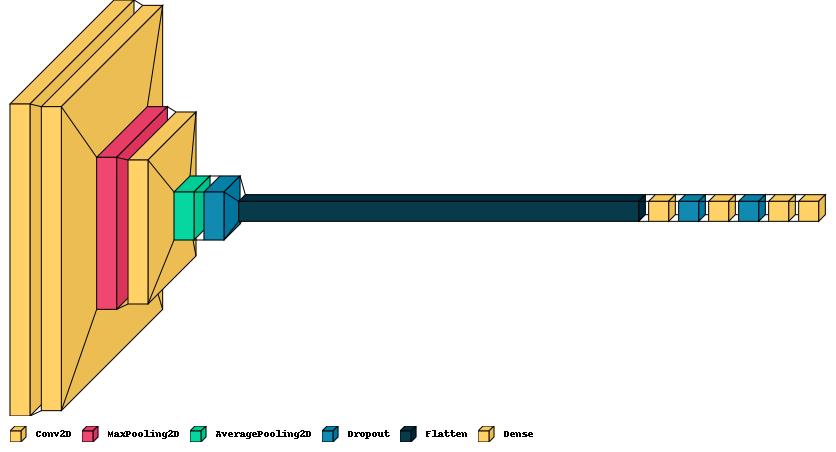

In [35]:
#visualkeras.layered_view(cnn_model,legend=True).show() # display using your system viewer
visualkeras.layered_view(cnn_model, to_file=path2+'/output2.png') # write to disk
#visualkeras.layered_view(cnn_model, to_file=path2+'/output.png').show() # write and show

visualkeras.layered_view(cnn_model,legend=True)

In [36]:
history_=cnn_model.fit(train_data,
                            steps_per_epoch=train_data.n//train_data.batch_size,
                            validation_data=test_data,
                            validation_steps=test_data.n//test_data.batch_size,
                            callbacks=callbacks,
                             epochs=10)

2022-11-15 03:38:36.881250: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-11-15 03:38:39.092050: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1061/1061 [==============================] - 120s 104ms/step - loss: 0.2832 - accuracy: 0.8863 - val_loss: 0.1645 - val_accuracy: 0.9389

Epoch 00001: val_loss improved from inf to 0.16447, saving model to ./data set/data/CNNmodel2.h5
Epoch 2/10
1061/1061 [==============================] - 107s 101ms/step - loss: 0.1788 - accuracy: 0.9324 - val_loss: 0.1186 - val_accuracy: 0.9591

Epoch 00002: val_loss improved from 0.16447 to 0.11860, saving model to ./data set/data/CNNmodel2.h5
Epoch 3/10
1061/1061 [==============================] - 107s 101ms/step - loss: 0.1480 - accuracy: 0.9460 - val_loss: 0.1079 - val_accuracy: 0.9644

Epoch 00003: val_loss improved from 0.11860 to 0.10787, saving model to ./data set/data/CNNmodel2.h5
Epoch 4/10
1061/1061 [==============================] - 108s 102ms/step - loss: 0.1246 - accuracy: 0.9555 - val_loss: 0.0829 - val_accuracy: 0.9718

Epoch 00004: val_loss improved from 0.10787 to 0.08292, saving model to ./data set/data/CNNmodel2.h5
Epoch 5/10
1061

In [37]:
cnn_model_his_history=history_.history

In [38]:
cnn_model_his_history

{'loss': [0.2831573486328125,
  0.17881064116954803,
  0.1479955017566681,
  0.12456829845905304,
  0.11103314906358719,
  0.09988521784543991,
  0.08989261090755463,
  0.08599535375833511,
  0.07998295873403549,
  0.07409629970788956],
 'accuracy': [0.8863458633422852,
  0.9323704838752747,
  0.9460467100143433,
  0.9555375576019287,
  0.9603860974311829,
  0.9646452069282532,
  0.9684621691703796,
  0.970215916633606,
  0.9719254374504089,
  0.9740918278694153],
 'val_loss': [0.16446693241596222,
  0.11860406398773193,
  0.10786961019039154,
  0.08291727304458618,
  0.07748578488826752,
  0.06780695170164108,
  0.0691886618733406,
  0.05901823937892914,
  0.05720478296279907,
  0.054341793060302734],
 'val_accuracy': [0.9388561248779297,
  0.9591391682624817,
  0.9643868207931519,
  0.9717570543289185,
  0.9729363322257996,
  0.9762381911277771,
  0.9778891801834106,
  0.9794811606407166,
  0.9791862964630127,
  0.98060142993927],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0

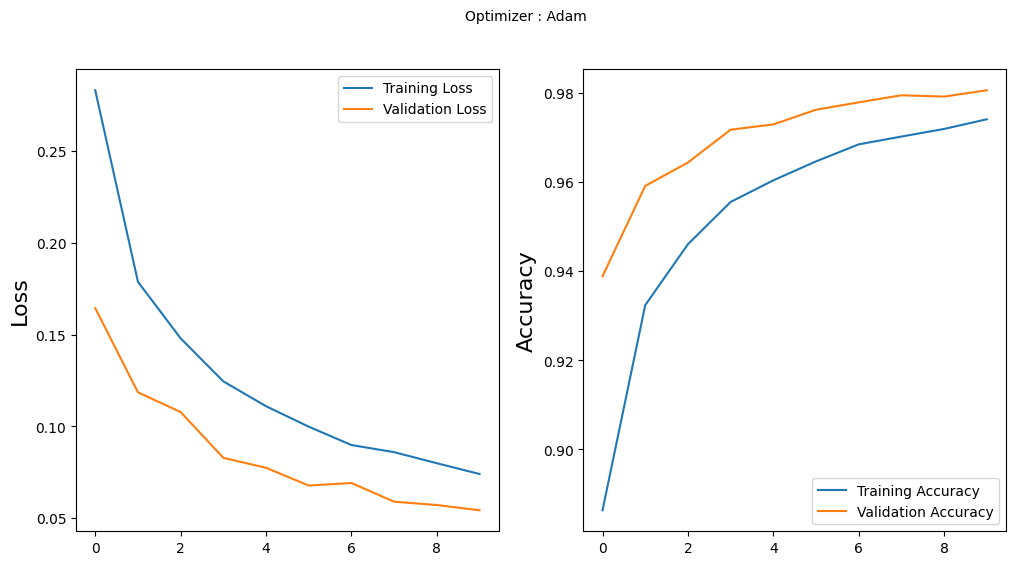

In [39]:
plt.style.use('default')

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(cnn_model_his_history['loss'], label='Training Loss')
plt.plot(cnn_model_his_history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(cnn_model_his_history['accuracy'], label='Training Accuracy')
plt.plot(cnn_model_his_history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

### Evaluate the model

In [40]:
from keras.models import load_model
model=load_model('./data set/data/CNNmodel2.h5')

In [41]:
val_datagen= image.ImageDataGenerator(rescale=1./255)

val_data= val_datagen.flow_from_directory("../input/eyes-test/test_model/test",
                                            class_mode="binary",
                                            color_mode="grayscale",
                                            classes=["Closed","Open"],
                                            shuffle=False,
                                            target_size=(80,80),
                                            batch_size=1,
                                            )

Found 755 images belonging to 2 classes.


In [42]:
val_data.class_indices

{'Closed': 0, 'Open': 1}

In [43]:
predictions = model.predict(val_data)

In [44]:
results = model.evaluate(val_data)
print(f"Test score: {results}")
print('The current model achieved a categorical accuracy of {}%!'.format(round(results[1]*100,2)))

755/755 [==============================] - 3s 4ms/step - loss: 0.2252 - accuracy: 0.9285
Test score: [0.22523076832294464, 0.9284768104553223]
The current model achieved a categorical accuracy of 92.85%!


In [45]:
from sklearn.metrics import classification_report
import numpy 
predicted_classes =  np.where(predictions>0.5, 1, 0)
true_classes = val_data.classes
class_labels = list(val_data.class_indices.keys())   
report=classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

      Closed       0.97      0.89      0.93       395
        Open       0.89      0.97      0.93       360

    accuracy                           0.93       755
   macro avg       0.93      0.93      0.93       755
weighted avg       0.93      0.93      0.93       755



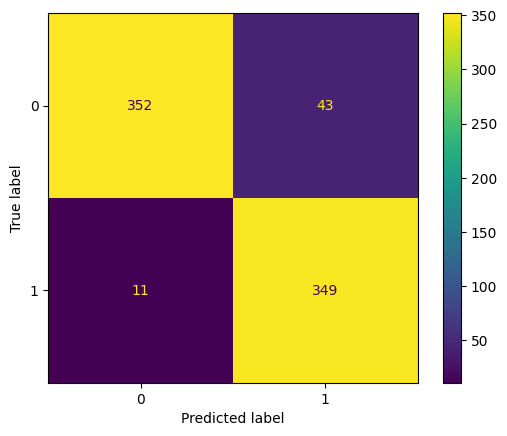

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            )
disp.plot()
plt.show()

### Model Architecture using InceptionV3

In [47]:
train_datagen= image.ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,zoom_range=0.2)

train_data= train_datagen.flow_from_directory(path2+"/train",
                                              class_mode="binary",
                                              shuffle=True,
                                              target_size=(80,80),
                                              batch_size=64,
                                              )

test_datagen= image.ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,zoom_range=0.2)
test_data= test_datagen.flow_from_directory(path2+"/test",
                                            class_mode="binary",
                                            shuffle=True,
                                            target_size=(80,80),
                                            batch_size=64,
                                            )

Found 67919 images belonging to 2 classes.
Found 16961 images belonging to 2 classes.


In [48]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output

hmodel = Flatten()(hmodel)
hmodel = Dense(128, activation="relu")(hmodel)
hmodel = Dropout(0.25,seed=1234)(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.25,seed=1234)(hmodel)
hmodel = Dense(32, activation='relu')(hmodel)
hmodel = Dense(16, activation='relu')(hmodel)
hmodel = Dense(1,activation= 'sigmoid')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

87924736/87910968 [==============================] - 1s 0us/step


In [49]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 39, 39, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 39, 39, 32)   96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 39, 39, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [50]:
checkpoint = ModelCheckpoint('./data set/data/premodel.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)
earlystop = EarlyStopping(monitor = 'val_loss', patience=3, verbose=0, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose=0)

callbacks=[checkpoint,earlystop,learning_rate]

In [51]:
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
history_=model.fit(train_data,
                    steps_per_epoch=train_data.n//train_data.batch_size,
                    validation_data=test_data,
                    validation_steps=test_data.n//test_data.batch_size,
                    callbacks=callbacks,
                    epochs=10)

Epoch 1/10
1061/1061 [==============================] - 208s 191ms/step - loss: 0.1569 - accuracy: 0.9383 - val_loss: 0.1132 - val_accuracy: 0.9556

Epoch 00001: val_loss improved from inf to 0.11320, saving model to ./data set/data/premodel.h5
Epoch 2/10
1061/1061 [==============================] - 201s 190ms/step - loss: 0.1157 - accuracy: 0.9558 - val_loss: 0.1081 - val_accuracy: 0.9554

Epoch 00002: val_loss improved from 0.11320 to 0.10809, saving model to ./data set/data/premodel.h5
Epoch 3/10
1061/1061 [==============================] - 202s 190ms/step - loss: 0.1012 - accuracy: 0.9620 - val_loss: 0.0909 - val_accuracy: 0.9643

Epoch 00003: val_loss improved from 0.10809 to 0.09088, saving model to ./data set/data/premodel.h5
Epoch 4/10
1061/1061 [==============================] - 204s 192ms/step - loss: 0.0918 - accuracy: 0.9650 - val_loss: 0.0829 - val_accuracy: 0.9675

Epoch 00004: val_loss improved from 0.09088 to 0.08286, saving model to ./data set/data/premodel.h5
Epoch 5/

In [53]:

premodel_history=history_.history

In [54]:
premodel_history

{'loss': [0.156851664185524,
  0.1156851127743721,
  0.10116033256053925,
  0.09177619963884354,
  0.08611253648996353,
  0.08182995021343231,
  0.08038216084241867,
  0.07693233340978622,
  0.07294090837240219,
  0.07128380984067917],
 'accuracy': [0.9382506608963013,
  0.9557586312294006,
  0.9619777202606201,
  0.9649841785430908,
  0.967710554599762,
  0.9688748121261597,
  0.9697737693786621,
  0.9716454148292542,
  0.9729717969894409,
  0.9734286069869995],
 'val_loss': [0.11319533735513687,
  0.10808868706226349,
  0.09088131785392761,
  0.08285575360059738,
  0.07996170967817307,
  0.07578746229410172,
  0.07825827598571777,
  0.06773068010807037,
  0.07241827249526978,
  0.06678888201713562],
 'val_accuracy': [0.9556013941764832,
  0.9553655385971069,
  0.9642688632011414,
  0.9674528241157532,
  0.9697523713111877,
  0.9715802073478699,
  0.9716391563415527,
  0.9735848903656006,
  0.9733490347862244,
  0.9749410152435303],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.

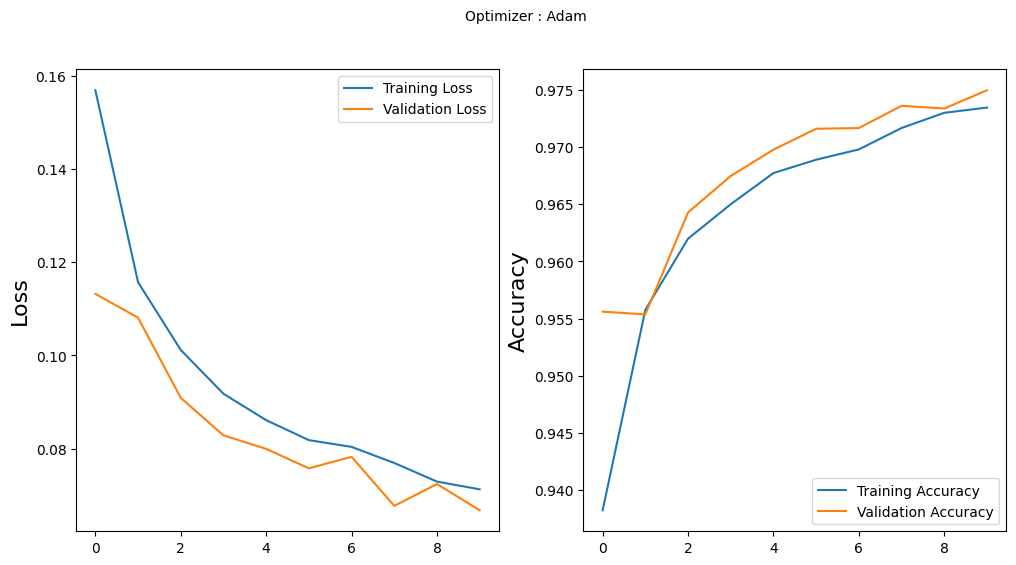

In [55]:
plt.style.use('default')

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(premodel_history['loss'], label='Training Loss')
plt.plot(premodel_history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(premodel_history['accuracy'], label='Training Accuracy')
plt.plot(premodel_history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [56]:
model=load_model('./data set/data/premodel.h5')

In [57]:
val_datagen= image.ImageDataGenerator(rescale=1./255)

val_data= val_datagen.flow_from_directory("../input/eyes-test/test_model/test",
                                            class_mode="binary",
                                            classes=["Closed","Open"],
                                            shuffle=False,
                                            target_size=(80,80),
                                            batch_size=1,
                                            )

Found 755 images belonging to 2 classes.


In [58]:
val_data.class_indices

{'Closed': 0, 'Open': 1}

In [59]:
predictions = model.predict(val_data)
results = model.evaluate(val_data)
print(f"Test score: {results}")
print('The current model achieved a categorical accuracy of {}%!'.format(round(results[1]*100,2)))

755/755 [==============================] - 14s 17ms/step - loss: 0.2267 - accuracy: 0.9166
Test score: [0.22665247321128845, 0.9165562987327576]
The current model achieved a categorical accuracy of 91.66%!


In [60]:
predicted_classes =  np.where(predictions>0.5, 1, 0)
true_classes = val_data.classes
class_labels = list(val_data.class_indices.keys())   
report=classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

      Closed       0.94      0.89      0.92       395
        Open       0.89      0.94      0.91       360

    accuracy                           0.92       755
   macro avg       0.92      0.92      0.92       755
weighted avg       0.92      0.92      0.92       755



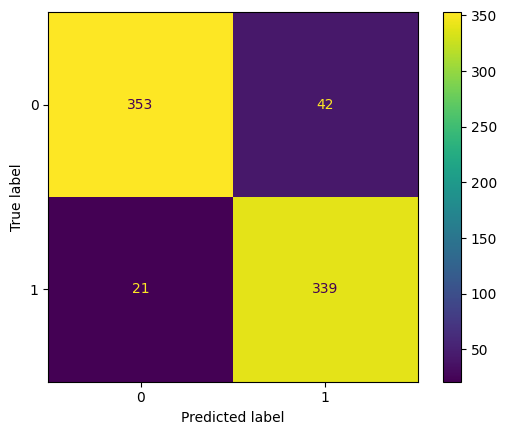

In [61]:
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            )
disp.plot()
plt.show()

### we need to incease more images with more features so i will merage eye dataset with our dataset

## import libaries :

In [62]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical
import random, shutil
from keras.models import Sequential
from keras.layers import (
    Dropout,
    Conv2D,
    Flatten,
    Dense,
    MaxPooling2D,
    BatchNormalization,
)
from keras.models import load_model

In [63]:
def generator(
    dir,
    gen=image.ImageDataGenerator(rescale=1.0 / 255),
    shuffle=True,
    batch_size=1,
    target_size=(24, 24),
    class_mode="categorical",
    color_mode="grayscale"
):

    return gen.flow_from_directory(
        dir,
        batch_size=batch_size,
        shuffle=shuffle,
        color_mode=color_mode,
        class_mode=class_mode,
        classes=["Closed","Open"],
        target_size=target_size,
    )

In [64]:
BS = 32
TS = (24, 24)
train_batch = generator("../input/eye-images/dataset_new/train", shuffle=True, batch_size=BS, target_size=TS)
valid_batch = generator("../input/eye-images/dataset_new/test", shuffle=True, batch_size=BS, target_size=TS)
SPE = len(train_batch.classes) // BS
VS = len(valid_batch.classes) // BS
print(SPE, VS)

Found 55588 images belonging to 2 classes.
Found 13800 images belonging to 2 classes.
1737 431


In [65]:
cnn_model = Sequential(
    [
        Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(24, 24, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.25),
        Dense(64, activation="relu"),
        Dropout(0.25),
        Dense(32, activation="relu"),
        Dropout(0.25),
        Dense(2, activation="softmax")
    ]
)

In [66]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 22, 22, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 1, 64)         

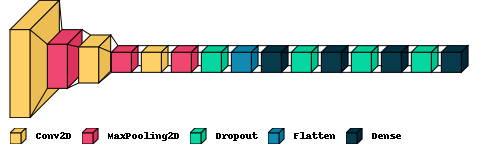

In [67]:
#visualkeras.layered_view(cnn_model,legend=True).show() # display using your system viewer
visualkeras.layered_view(cnn_model, to_file=path2+'/output2.png') # write to disk
#visualkeras.layered_view(cnn_model, to_file=path2+'/output.png').show() # write and show

visualkeras.layered_view(cnn_model,legend=True)

In [68]:
checkpoint = ModelCheckpoint('./data set/data/cnnfinal.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=2, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=2, verbose= 3 )

callbacks=[checkpoint,earlystop,learning_rate]

In [69]:
cnn_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [70]:
history_=cnn_model.fit(
                        train_batch,
                        validation_data=valid_batch,
                        epochs=10,
                        steps_per_epoch=SPE,
                        validation_steps=VS,
                        callbacks=callbacks
                        )

Epoch 1/10
1737/1737 [==============================] - 359s 206ms/step - loss: 0.2296 - accuracy: 0.9062 - val_loss: 0.1087 - val_accuracy: 0.9614

Epoch 00001: val_loss improved from inf to 0.10869, saving model to ./data set/data/cnnfinal.h5
Epoch 2/10
1737/1737 [==============================] - 80s 46ms/step - loss: 0.1207 - accuracy: 0.9589 - val_loss: 0.0848 - val_accuracy: 0.9692

Epoch 00002: val_loss improved from 0.10869 to 0.08477, saving model to ./data set/data/cnnfinal.h5
Epoch 3/10
1737/1737 [==============================] - 79s 45ms/step - loss: 0.1003 - accuracy: 0.9656 - val_loss: 0.0810 - val_accuracy: 0.9721

Epoch 00003: val_loss improved from 0.08477 to 0.08097, saving model to ./data set/data/cnnfinal.h5
Epoch 4/10
1737/1737 [==============================] - 78s 45ms/step - loss: 0.0897 - accuracy: 0.9696 - val_loss: 0.0777 - val_accuracy: 0.9704

Epoch 00004: val_loss improved from 0.08097 to 0.07766, saving model to ./data set/data/cnnfinal.h5
Epoch 5/10
173

In [71]:
cnn_model_his_history_= history_.history

In [72]:
cnn_model_his_history_

{'loss': [0.2296309769153595,
  0.12073955684900284,
  0.10033892840147018,
  0.0896887555718422,
  0.08129911869764328,
  0.07801646739244461,
  0.07203920930624008],
 'accuracy': [0.9061667323112488,
  0.9588523507118225,
  0.9655842781066895,
  0.9696162343025208,
  0.9714522361755371,
  0.9732882380485535,
  0.9760422110557556],
 'val_loss': [0.10868941992521286,
  0.08477076888084412,
  0.08097397536039352,
  0.07766159623861313,
  0.06879454851150513,
  0.07219702750444412,
  0.07108935713768005],
 'val_accuracy': [0.9614269137382507,
  0.9691850543022156,
  0.9720852375030518,
  0.9704176187515259,
  0.9752755165100098,
  0.9764356017112732,
  0.9742604494094849],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]}

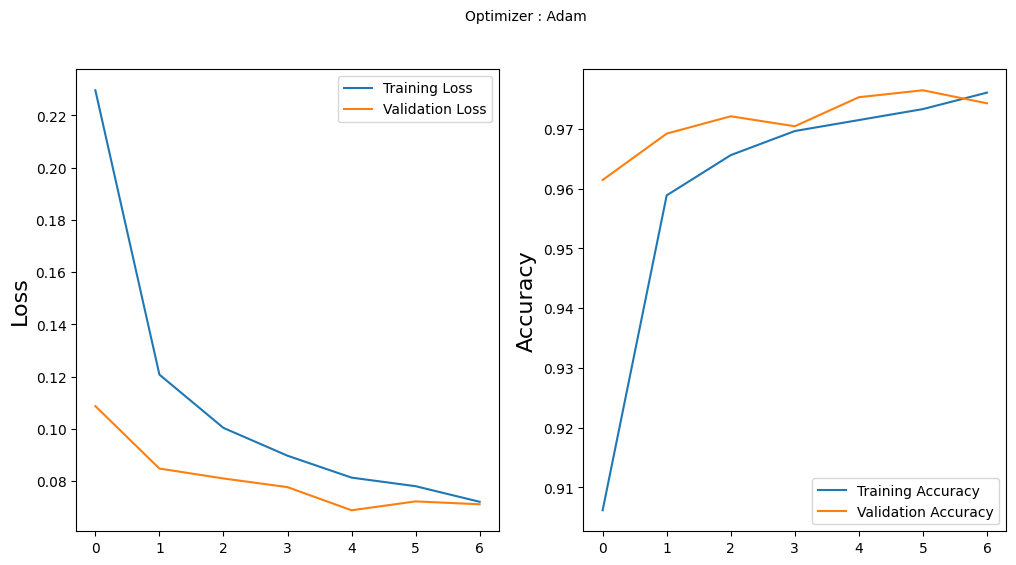

In [73]:
plt.style.use('default')

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(cnn_model_his_history_['loss'], label='Training Loss')
plt.plot(cnn_model_his_history_['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(cnn_model_his_history_['accuracy'], label='Training Accuracy')
plt.plot(cnn_model_his_history_['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [74]:
model=load_model('./data set/data/cnnfinal.h5')

In [75]:
valid_batch= generator("../input/eyes-test/test_model/test", shuffle=False, batch_size=32, target_size=(24,24))

Found 755 images belonging to 2 classes.


In [76]:
predicated=model.predict(valid_batch)

In [77]:
predicted_classes = np.argmax(predicated, axis=1) 
true_classes = valid_batch.classes
class_labels = list(valid_batch.class_indices.keys())   

In [78]:
report=classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

      Closed       0.98      0.96      0.97       395
        Open       0.95      0.97      0.96       360

    accuracy                           0.97       755
   macro avg       0.97      0.97      0.97       755
weighted avg       0.97      0.97      0.97       755



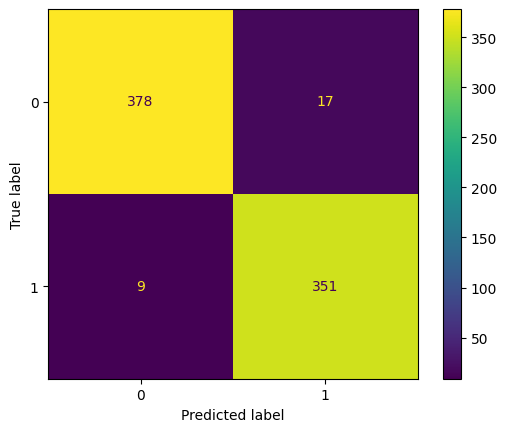

In [79]:
cm = confusion_matrix(true_classes, predicted_classes, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=[0,1])
disp.plot()

## Pretrained model 

In [80]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [81]:
BS = 32
TS = (80, 80)
gen=image.ImageDataGenerator(rescale=1.0 / 255)
train_batch = gen.flow_from_directory("../input/eye-images/dataset_new/train",  classes=["Closed","Open"], target_size=(80,80),batch_size=32,color_mode='rgb',class_mode="categorical")
valid_batch= gen.flow_from_directory("../input/eye-images/dataset_new/test",  classes=["Closed","Open"], target_size=(80,80),batch_size=32,color_mode='rgb',class_mode="categorical")
SPE = len(train_batch.classes) // BS
VS = len(valid_batch.classes) // BS
print(SPE, VS)

Found 55588 images belonging to 2 classes.
Found 13800 images belonging to 2 classes.
1737 431


In [82]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(128, activation="relu")(hmodel)
hmodel = Dropout(0.25)(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.25)(hmodel)
hmodel = Dense(32, activation='relu')(hmodel)
hmodel = Dropout(0.25)(hmodel)
hmodel = Dense(16, activation='relu')(hmodel)
hmodel = Dropout(0.25)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)
model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [83]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_100 (Conv2D)             (None, 39, 39, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 39, 39, 32)   96          conv2d_100[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 39, 39, 32)   0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [84]:
checkpoint = ModelCheckpoint('./data set/data/pretrainedfinal.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=2, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=2, verbose= 3 )

callbacks=[checkpoint,earlystop,learning_rate]

In [85]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history_= model.fit(train_batch,
                                validation_data=valid_batch,
                                epochs=10,
                                steps_per_epoch=SPE,
                                validation_steps=VS,
                                callbacks=callbacks )

Epoch 1/10
1737/1737 [==============================] - 107s 58ms/step - loss: 0.1780 - accuracy: 0.9355 - val_loss: 0.1128 - val_accuracy: 0.9577

Epoch 00001: val_loss improved from inf to 0.11279, saving model to ./data set/data/pretrainedfinal.h5
Epoch 2/10
1737/1737 [==============================] - 103s 59ms/step - loss: 0.1204 - accuracy: 0.9579 - val_loss: 0.1038 - val_accuracy: 0.9598

Epoch 00002: val_loss improved from 0.11279 to 0.10375, saving model to ./data set/data/pretrainedfinal.h5
Epoch 3/10
1737/1737 [==============================] - 102s 59ms/step - loss: 0.1055 - accuracy: 0.9638 - val_loss: 0.1009 - val_accuracy: 0.9631

Epoch 00003: val_loss improved from 0.10375 to 0.10095, saving model to ./data set/data/pretrainedfinal.h5
Epoch 4/10
1737/1737 [==============================] - 102s 59ms/step - loss: 0.0954 - accuracy: 0.9671 - val_loss: 0.0885 - val_accuracy: 0.9695

Epoch 00004: val_loss improved from 0.10095 to 0.08853, saving model to ./data set/data/pre

In [86]:
pre_model_history= history_.history

In [87]:
pre_model_history

{'loss': [0.17798876762390137,
  0.12040182203054428,
  0.10552791506052017,
  0.09536439180374146,
  0.08435302972793579,
  0.07621433585882187,
  0.07230725884437561,
  0.06783712655305862],
 'accuracy': [0.9355065226554871,
  0.9579343199729919,
  0.9638382792472839,
  0.967114269733429,
  0.9704262614250183,
  0.9737021923065186,
  0.9753761887550354,
  0.9768521785736084],
 'val_loss': [0.11278530955314636,
  0.10375077277421951,
  0.10094765573740005,
  0.08852703124284744,
  0.0855087861418724,
  0.0838746577501297,
  0.09411787241697311,
  0.08659117668867111],
 'val_accuracy': [0.9576566219329834,
  0.9597592949867249,
  0.9630945324897766,
  0.9695475697517395,
  0.9702726006507874,
  0.971287727355957,
  0.9715052247047424,
  0.97324538230896],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]}

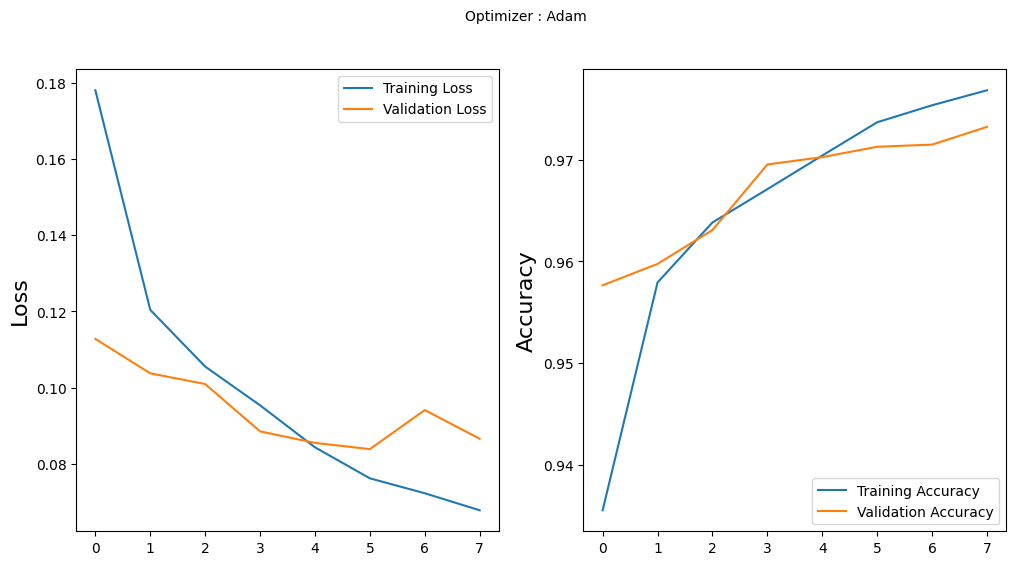

In [88]:
plt.style.use('default')

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(pre_model_history['loss'], label='Training Loss')
plt.plot(pre_model_history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(pre_model_history['accuracy'], label='Training Accuracy')
plt.plot(pre_model_history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [89]:
model=load_model('./data set/data/pretrainedfinal.h5')

In [90]:
valid_batch= generator("../input/eyes-test/test_model/test", shuffle=False, batch_size=32, target_size=(80,80),color_mode="rgb")

Found 755 images belonging to 2 classes.


In [91]:
predicated=model.predict(valid_batch)

In [92]:
predicted_classes = np.argmax(predicated, axis=1) 
true_classes = valid_batch.classes
class_labels = list(valid_batch.class_indices.keys())   

In [93]:
report=classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

      Closed       0.94      0.96      0.95       395
        Open       0.96      0.93      0.95       360

    accuracy                           0.95       755
   macro avg       0.95      0.95      0.95       755
weighted avg       0.95      0.95      0.95       755



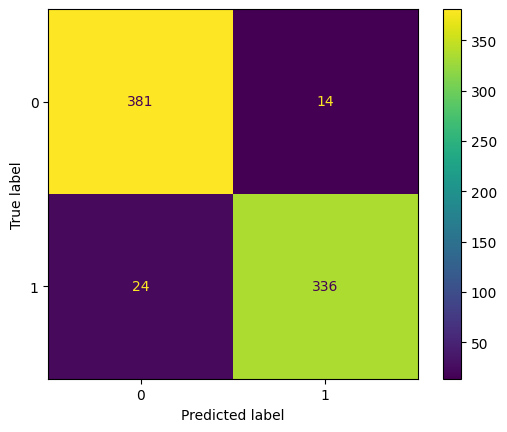

In [94]:
cm = confusion_matrix(true_classes, predicted_classes, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=[0,1])
disp.plot()
plt.show()

### [More details in Github link](https://github.com/Abdelaziz-Nabil/CNN-Detection-Of-Eyes-and-Classification)

https://github.com/Abdelaziz-Nabil/CNN-Detection-Of-Eyes-and-Classification